In [83]:
import pandas as pd
import requests
import io
import math 
import numpy as np
# Fetch the data 
url = "https://raw.githubusercontent.com/hackintoshrao/blog-posts/master/Neural%20Nets/Building%20Neural%20Nets%20From%20Scratch/Part%202/code/HR_comma_sep.csv"
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

subset_data = data.filter(["satisfaction_level","left"],axis=1)
training_examples = new.drop(["left"], axis=1)

training_data = training_examples.values 

labels = subset_data.filter(["left"],axis=1).values

print(training_examples.head())




   satisfaction_level  last_evaluation
0                0.38             0.53
1                0.80             0.86
2                0.11             0.88
3                0.72             0.87
4                0.37             0.52


In [84]:
## The sigmoid function adjusts the cost function hypotheses to adjust the algorithm proportionally for worse estimations
def Sigmoid(z):
	G_of_Z = float(1.0 / float((1.0 + math.exp(-1.0*z))))
	return G_of_Z 

##The hypothesis is the linear combination of all the known factors x[i] and their current estimated coefficients theta[i] 
##This hypothesis will be used to calculate each instance of the Cost Function
def Hypothesis(theta, x, bias):
    z = 0
    for i in xrange(len(theta)):
        z += x[i]*theta[i]
    z += bias
    
    return Sigmoid(z)

##For each member of the dataset, the result (Y) determines which variation of the cost function is used
##The Y = 0 cost function punishes high probability estimations, and the Y = 1 it punishes low scores
##The "punishment" makes the change in the gradient of ThetaCurrent - Average(CostFunction(Dataset)) greater
def Cost_Function(X,Y,theta, m, bias):
	sumOfErrors = 0
	for i in xrange(m):
		xi = X[i]
		hi = Hypothesis(theta, xi, bias)
        #print("Hypothesis: ",hi)
        if Y[i] == 1:
            error = Y[i] * math.log(hi)
        elif Y[i] == 0:
            error = (1-Y[i]) * math.log(1-hi)
        sumOfErrors += error
        #print("error: ", error)
	const = -1/m
	J = const * sumOfErrors
	#print 'cost is ', J 
	return J




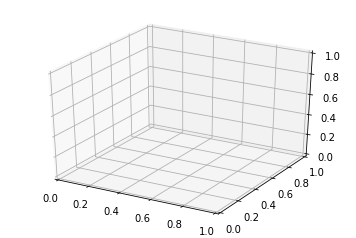

In [85]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

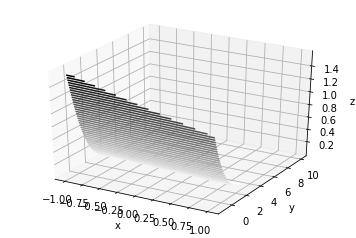

In [86]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 10, 100)

W1, B = np.meshgrid(x, y)

Z = np.zeros((100, 100))
for i in range(len(W1)):
    for j in range(len(W1)):
        Z[i, j] = Cost_Function(training_data, labels, [W1[i,j]], len(arr), B[i,j])


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(W1, B, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

